# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

import os, re, gc, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import seaborn as sn
import anndata
import scanpy as sc
import sctk as sk

rcParams["pdf.fonttype"] = 42
rcParams["ps.fonttype"] = 42
expr_cmap = sk.expression_colormap()
np.set_printoptions(linewidth=150)

import numpy_groupies as npg
from sklearn.preprocessing import minmax_scale

# Load data

## fetal-organoid data

In [40]:
fo_ad = sc.read(
    "../20200806_organoid_integration_comparison/h5ad/pooled_mesenchymal.processed.h5ad"
)

In [41]:
fo_ad

AnnData object with n_obs × n_vars = 6213 × 16797
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor', 'gender', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot2', 'sample_id', 'strain', 'week', 'annot', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'joint_annot'
    var: 'gene_ids', 'hb', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells', 'highly_variable', 'hvg_full'
    uns: 'leiden', 'neighbors', 'neighbors_hm', 'pca'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [42]:
sk.show_obs_categories(fo_ad, columns=["dataset"])

dataset, 2
fetal_skin    2848
organoid      3365
Name: dataset, dtype: int64




In [78]:
sk.LR_predict(
    fo_ad,
    "../20210611_final_object/fetal_skin.independent_annotation_refined_20220202.lognorm.pkl",
    key_added="fsk_pred",
    min_prob=0,
)

18812 features used for prediction


In [87]:
sk.LR_predict(
    fo_ad,
    "../20210611_final_object/fetal_skin.independent_annotation_refined_20220202.lognorm.pkl",
    key_added="fsk_pred30",
    min_prob=0.3,
)

18812 features used for prediction


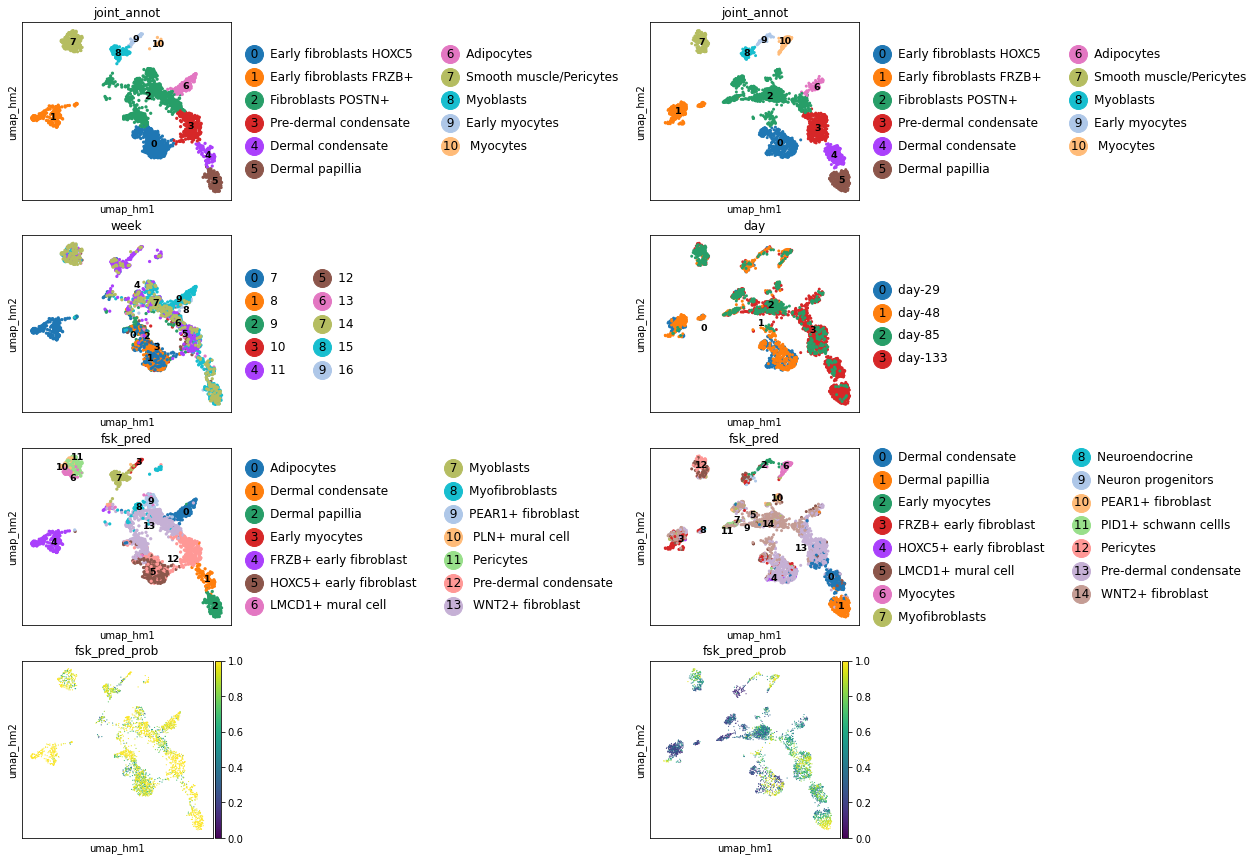

In [117]:
sk.clear_colors(fo_ad)
sk.set_figsize((15, 15))
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, gridspec_kw={"wspace": 2})
for i, ds in enumerate(["fetal_skin", "organoid"]):
    ad = fo_ad[fo_ad.obs.dataset == ds]
    for j, v in enumerate(["joint_annot", "week", "fsk_pred", "fsk_pred_prob"]):
        if i == 1 and v == "week":
            v = "day"
        if fo_ad.obs[v].dtype.kind == "O":
            sk.plot_embedding(
                ad, basis="umap_hm", groupby=v, min_group_size=10, ax=axs[j, i], show=False,
            )
        else:
            sc.pl.embedding(
                ad, basis="umap_hm", color=v, ax=axs[j, i], show=False, vmin=0, vmax=1, size=5,
            )

Text(-20, 0, 'organoid')

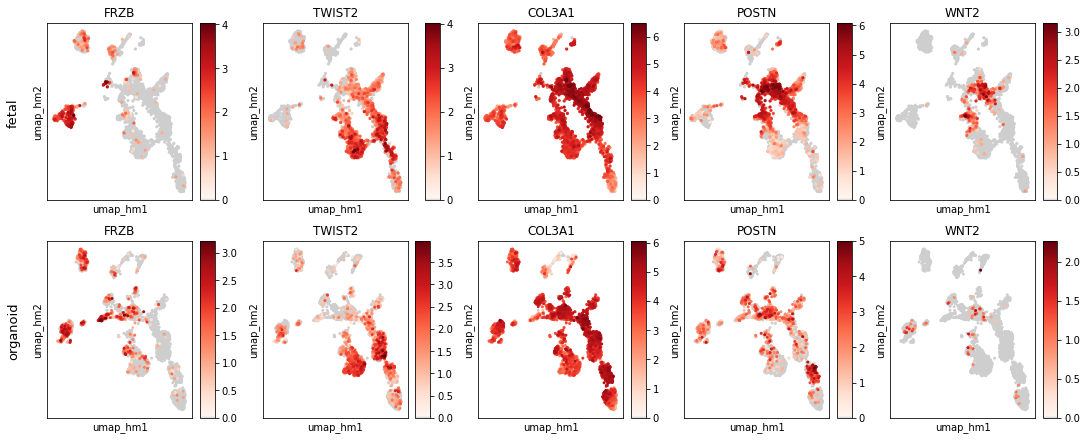

In [72]:
sk.set_figsize((15, 6))
fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, constrained_layout=True)
for i, ds in enumerate(["fetal_skin", "organoid"]):
    ad = fo_ad[fo_ad.obs.dataset == ds]
    for j, g in enumerate(["FRZB", "TWIST2", "COL3A1", "POSTN", "WNT2"]):
        sc.pl.embedding(
            ad, basis="umap_hm", color=g, ax=axs[i, j], show=False, cmap=expr_cmap, vmin=0
        )
axs[0, 0].text(x=-20, y=0, s="fetal", rotation=90, size=13, va="center")
axs[1, 0].text(x=-20, y=0, s="organoid", rotation=90, size=13, va="center")